In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('../../Recast/CMS-TOP-20-001_mtt/pp2tt_formFactors_scan.pcl')

### Plot limit on yDM

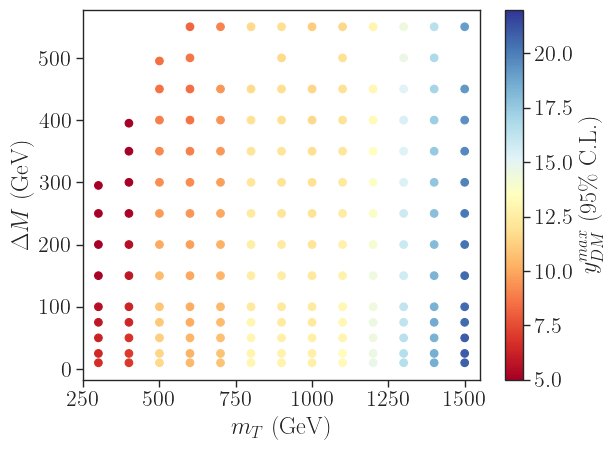

In [3]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

### Interpolate for a denser grid

In [4]:
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([5.,10.,12.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

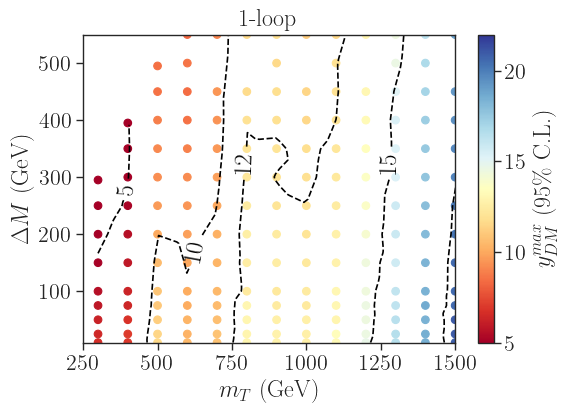

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

In [6]:
recastData[recastData['mST'] ==600.][['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
33,600.0,50.0,8.198633
34,600.0,100.0,8.593162
35,600.0,150.0,8.389651
36,600.0,200.0,8.525574
37,600.0,250.0,8.983493
38,600.0,300.0,9.245042
39,600.0,350.0,9.461793
40,600.0,400.0,9.779410
41,600.0,450.0,9.942272
42,600.0,500.0,10.076639


In [7]:
recastData[recastData['mST'] ==500.][['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
20,500.0,5.0,8.510950
21,500.0,50.0,8.575852
22,500.0,100.0,8.861859
23,500.0,150.0,9.166725
24,500.0,200.0,9.293832
25,500.0,250.0,9.607698
26,500.0,300.0,9.982050
27,500.0,350.0,10.529676
28,500.0,400.0,10.863405
29,500.0,425.0,10.990090


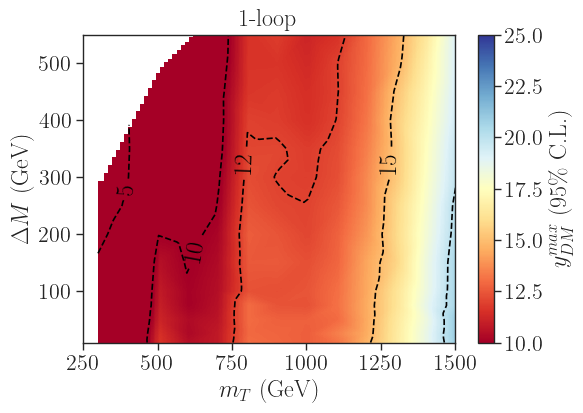

In [8]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=10,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

### Save contour curves to text files

In [9]:
fname = 'CMS_mtt_oneLoop_contours.csv'
saveContours(contoursDict,fname,header='mST_GeV,deltaM_GeV')


Contours saved to CMS_mtt_oneLoop_contours.csv
